In [34]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

Sử dụng GD với momentum như trong vật lý:
$$v_t = \gamma v_{v-1} + \eta \nabla f(x)$$
$$x_n = x_{n-1} - v_t$$
Trong đó:
- $\gamma$ là hệ số momentum
- $\eta$ là learning rate
- $v$ là vận tốc
- $x_n$ là vị trí mới
- $x_{n-1}$ là vị trí cũ
- $\nabla f(x)$ là đạo hàm của hàm số tại vị trí $x_{n-1}$
- $f(x)$ là hàm số cần tối ưu

In [35]:
def numerical_grad(fx, x, eps=1e-6): # tính đạo hàm số bằng cách xấp xỉ đạo hàm
    return (fx(x+eps) - fx(x-eps))/(2*eps)

In [36]:
def GD_momentum(fx, x_init, learning_rate=0.01, gamma=0.9, max_iter=1000, tol=1e-3):
    x = x_init # khởi tạo vị trí
    v = np.zeros_like(x) # khởi tạo vận tốc
    it = 0
    for i in range(max_iter):
        grad = numerical_grad(fx,x) # tính đạo hàm tại vị trí hiện tại 
        v = gamma*v + learning_rate*grad # cập nhật vận tốc
        x = x - v # cập nhật vị trí
        it +=1
        if np.linalg.norm(grad) < tol: # kiểm tra điều kiện dừng
            break
    return x,it # trả về vị trí tối ưu

In [37]:
x_opt = GD_momentum(lambda x: x[0]**2+x[1]**2, np.array([10,10]))
x_opt

(array([-0.00135042, -0.00135042]), 136)

TypeError: unsupported operand type(s) for ** or pow(): 'tuple' and 'int'

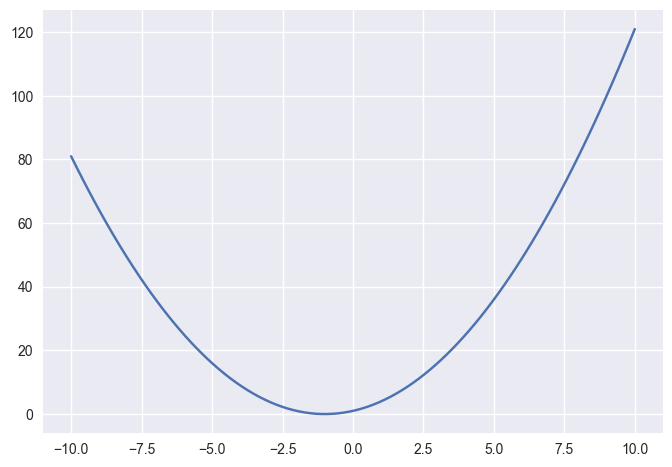

In [38]:
x= np.linspace(-10,10,100)
y = x**2+2*x+1
plt.plot(x,y)
plt.scatter(x_opt, x_opt**2+2*x_opt+1, c='red')

Phương pháp NAG (Nesterov Accelerated Gradient) là một biến thể của phương pháp GD với momentum. GD với momentum thường sẽ dao động rất lâu quanh cực tiểu của hàm ố, làm cho thời gian tìm kiếm cực tiểu tăng lên. NAG sẽ cố gắng dự đoán vị trí tiếp theo của vị trí hiện tại, từ đó giảm thiểu dao động và tăng tốc độ hội tụ:

Thay vì cập nhật với : 
$$v_t = \gamma v_{v-1} + \eta \nabla f(x)$$
Ta sẽ tính toán vị trí dự đoán tiếp theo:
$$x_{pred} = x - \gamma v_{v-1}$$
Sau đó cập nhật vị trí mới:
$$v_t = \gamma v_{v-1} + \eta \nabla f(x_{pred})$$
$$x_n = x_{pred} - v_t$$

In [ ]:
def GD_NAG(fx, x_init, learning_rate=0.01, gamma=0.9, max_iter=1000, tol=1e-3):
    x = x_init # khởi tạo vị trí
    v = np.zeros_like(x) # khởi tạo vận tốc
    it = 0
    for i in range(max_iter):
        x_pred = x - gamma*v # dự đoán vị trí tiếp theo
        grad = numerical_grad(fx,x_pred) # tính đạo hàm tại vị trí dự đoán
        v = gamma*v + learning_rate*grad # cập nhật vận tốc
        x = x_pred - v # cập nhật vị trí
        it += 1
        if np.linalg.norm(grad) < tol:
            break
    return x, it

In [ ]:
x_opt = GD_NAG(lambda x: x[0]**2+x[1]**2, np.array([10,10]))
x_opt

Chúng ta sẽ sử dụng bài toán hồi quy tuyến tính để minh họa phương pháp GD với momentum và NAG:
$${J} = \frac{1}{2N} \sum_{i=1}^{N} (y_i - \hat{y_i})^2$$
Trong đó:
- $N$ là số lượng mẫu
- $y_i$ là giá trị thực tế
- $\hat{y_i}$ là giá trị dự đoán
- $J$ là hàm mất mát
- $\theta$ là tham số cần tối ưu
- $\hat{y_i} = \theta_0 + \theta_1x_i$

In [39]:
def loss(y, y_hat):
    return 0.5*np.mean((y-y_hat)**2)

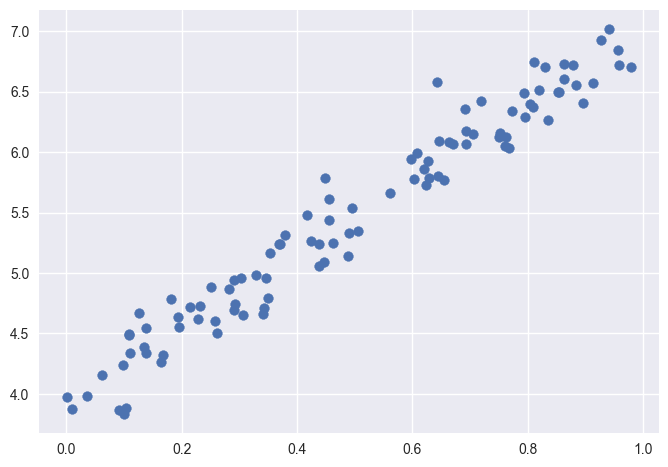

In [43]:
x = np.random.rand(100)
y = 4 + 3*x + .2*np.random.randn(100)
plt.scatter(x,y)

In [48]:
x_opt_GD_momentum = GD_momentum(lambda theta: loss(y, theta[0]+theta[1]*x), np.array([0.,0.]), learning_rate=0.1)
x_opt_NAG = GD_NAG(lambda theta: loss(y, theta[0]+theta[1]*x), np.array([0.,0.]), learning_rate=0.1)
print(x_opt_GD_momentum)
print(x_opt_NAG)

(array([3.6383329, 3.6383329]), 105)
(array([3.62447667, 3.62447667]), 98)


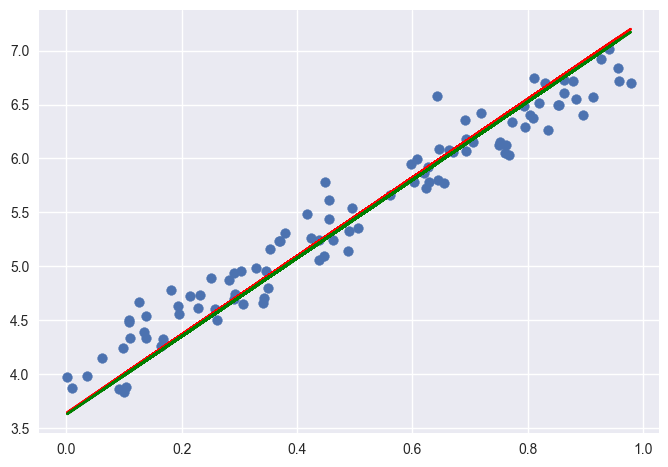

In [49]:
plt.plot(x, x_opt_GD_momentum[0][0]+x_opt_GD_momentum[0][1]*x, c='red')
plt.plot(x, x_opt_NAG[0][0]+x_opt_NAG[0][1]*x, c='green')
plt.scatter(x,y)

Cách biến thể của GD:
1. Stochastic Gradient Descent (SGD)
  Thuật toán này sẽ 
2. Mini-batch Gradient Descent